In [6]:
from keras.layers import *
from keras.layers.core import Lambda
from keras.models import Model
from keras import regularizers
from keras.models import Model
from keras import backend as K
from keras.callbacks import TensorBoard

def get_cnn_architecture(weights_path=None):
    
    #input_img = Input(shape=(64,64,3))  # adapt this if using `channels_first` image data format
    input_img = Input(shape=(28, 28, 1))
    
    #encoder
    x1 = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
    x = MaxPooling2D((2, 2), padding='same')(x1)
    x2 = Conv2D(32, (3, 3), activation='relu', padding='same')(x) 
    encoded = MaxPooling2D((2, 2), padding='same')(x2)
    x = Conv2D(32, (3, 3), activation='relu', padding='same')(encoded)

    '''x = MaxPooling2D((2, 2), padding='same')(fg2)
    x3 = Conv2D(128, (3, 3), activation='relu', padding='same')(x) 
    x = MaxPooling2D((2, 2), padding='same')(x3)
    x4 = Conv2D(256, (3, 3), activation='relu', padding='same')(x) 
    x = MaxPooling2D((2, 2), padding='same')(x4)
    x5 = Conv2D(512, (3, 3), activation='relu', padding='same')(x)''' 
    
    #decoder
    x = UpSampling2D((2, 2))(x)
    y1 = Conv2D(32, (3, 3), activation='relu', padding='same')(x) 
    x = UpSampling2D((2, 2))(y1)
    decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)
    
    '''y2 = Conv2DTranspose(128, (3, 3), activation='relu', padding='same')(x) 
    x = UpSampling2D((2, 2))(y2)
    
    y3 = Conv2DTranspose(64, (3, 3), activation='relu', padding='same')(x) 
    x = UpSampling2D((2, 2))(y3)
    
    y4 = Conv2DTranspose(64, (3, 3), activation='relu', padding='same')(x)
    y5 = Conv2DTranspose(3, (3, 3), activation='relu', padding='same')(y4)'''
    
    autoencoder = Model(input_img, decoded)
    autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')
    print(autoencoder.summary())
    return autoencoder

In [7]:
autoencoder = get_cnn_architecture()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 14, 14, 32)        9248      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 7, 7, 32)          9248      
_________________________________________________________________
up_sampling2d_5 (UpSampling2 (None, 14, 14, 32)        0   

In [8]:
from keras.datasets import mnist
import numpy as np

(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))  # adapt this if using `channels_first` image data format
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))  # adapt this if using `channels_first` image data format

noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape) 
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape) 

x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

11493376/11490434 [==============================] - 1s 0us/step


In [9]:
from keras.callbacks import TensorBoard

autoencoder.fit(x_train_noisy, x_train,
                epochs=5,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test_noisy, x_test),
                callbacks=[TensorBoard(log_dir='/tmp/tb', histogram_freq=0, write_graph=False)])

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 147s 2ms/step - loss: 0.1795 - val_loss: 0.1280
Epoch 2/5
60000/60000 [==============================] - 145s 2ms/step - loss: 0.1192 - val_loss: 0.1132
Epoch 3/5
60000/60000 [==============================] - 144s 2ms/step - loss: 0.1117 - val_loss: 0.1132
Epoch 4/5
60000/60000 [==============================] - 144s 2ms/step - loss: 0.1079 - val_loss: 0.1038
Epoch 5/5
60000/60000 [==============================] - 144s 2ms/step - loss: 0.1058 - val_loss: 0.1062


In [11]:
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model
from keras import backend as K
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio
from google.colab import drive
import numpy as np
from PIL import Image
import torch 
import torch.nn as nn
import torchvision
import torchvision.transforms as tf
import matplotlib.pyplot as plt
from PIL import Image
import scipy.io as sio
from torchvision.utils import make_grid

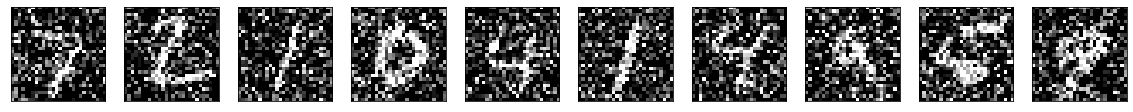

In [12]:
n = 10
plt.figure(figsize=(20, 2))
for i in range(n):
    ax = plt.subplot(1, n, i+1)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

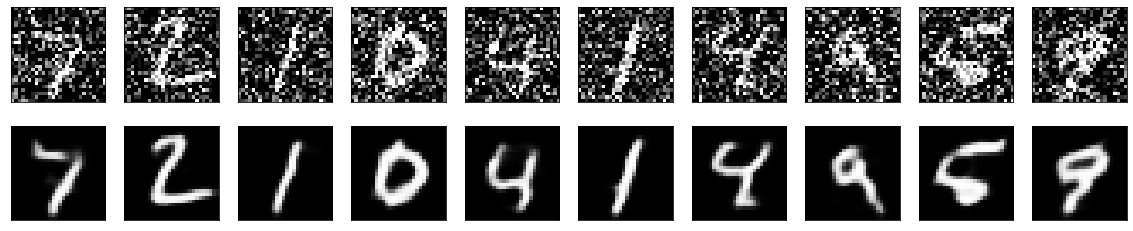

In [14]:
decoded_imgs = autoencoder.predict(x_test_noisy)

n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i+1)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

Now we apply denoising autoencoder in an Einstein photo


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


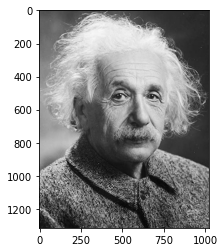

In [15]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Mount Google Drive
drive.mount('/content/drive')
data_path = '/content/drive/Shared drives/DeepLearning_2020/Final_Project/Data/'
results_path = '/content/drive/Shared drives/DeepLearning_2020/Final_Project/Results/'

img = cv2.imread(data_path+"ein.jpg")
img_cvt=cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img_cvt)
plt.show()


In [34]:
img = Image.open(data_path+"ein.jpg").convert('RGBA')
arr = np.array(img)

# record the original shape
shape = arr.shape

# make a 1-dimensional view of arr
flat_arr = arr.ravel()

# convert it to a matrix
vector = np.matrix(flat_arr)

# do something to the vector
#vector[:,::10] = 128

# reform a numpy array of the original shape
arr2 = np.asarray(vector).reshape(shape)
# recover the orginal image
#img2 = img_1D_vector.reshape(rows,cols,colors)

noise_factor = 0.5
x_train_noisy = x_train_noisy + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train_noisy.shape) 
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test = np.clip(x_test, 0., 1.)

In [35]:
from keras.callbacks import TensorBoard

autoencoder.fit(x_train_noisy, x_train,
                epochs=5,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test_noisy, x_test),
                callbacks=[TensorBoard(log_dir='/tmp/tb', histogram_freq=0, write_graph=False)])

ValueError: ignored